In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import sem
from scipy.stats import stats
from scipy.stats import linregress
import numpy as np

In [2]:
file = 'countries.csv'

In [3]:
Global_footprint_df = pd.read_csv(file)
Global_footprint_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Afghanistan,Middle East/Central Asia,29.82,0.46,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.24,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.60,6
1,Albania,Northern/Eastern Europe,3.16,0.73,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.55,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.87,6
2,Algeria,Africa,38.48,0.73,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.24,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.61,5
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
4,Antigua and Barbuda,Latin America,0.09,0.78,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.70,2


In [4]:
Global_footprint_df.dtypes

Country                            object
Region                             object
Population (millions)             float64
HDI                               float64
GDP per Capita                     object
Cropland Footprint                float64
Grazing Footprint                 float64
Forest Footprint                  float64
Carbon Footprint                  float64
Fish Footprint                    float64
Total Ecological Footprint        float64
Cropland                          float64
Grazing Land                      float64
Forest Land                       float64
Fishing Water                     float64
Urban Land                        float64
Total Biocapacity                 float64
Biocapacity Deficit or Reserve    float64
Earths Required                   float64
Countries Required                float64
Data Quality                       object
dtype: object

In [5]:
clean_dataset = Global_footprint_df.dropna()

In [6]:
x = np.array(clean_dataset['HDI'].values.tolist())
y = np.array(clean_dataset['Earths Required'].values.tolist())


In [7]:
slope, intercept, r_value, p_value, _ = stats.linregress(x,y)
fit = intercept + slope*x

Text(0.32, 7.1, 'R-squared = 0.54')

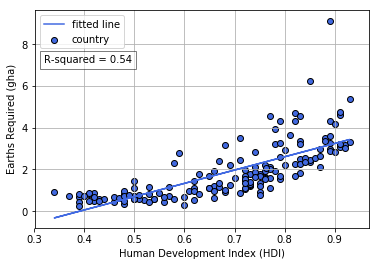

In [41]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker='o', color = 'royalblue', edgecolor = 'k', label = 'country')
plt.plot(x, fit, 'royalblue', label='fitted line')
plt.legend()
plt.grid()
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Earths Required (gha)')
plt.text(0.32, 7.1, "R-squared = 0.54",bbox=dict(facecolor='white', alpha=0.5))

In [17]:
Global_footprint_df['HDI'].max()
Global_footprint_df['HDI'].min()

0.34

In [18]:
bins = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Create the names for the four bins
group_names = ["<0.4", "0.41-0.5", "0.51-0.6", "0.61-0.7", "0.71-0.8", "0.81-0.9", ">0.9"]

Global_footprint_df["HDI_groups"] = pd.cut(Global_footprint_df["HDI"], bins, labels=group_names)

Global_footprint_df

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality,HDI_groups
0,Afghanistan,Middle East/Central Asia,29.820,0.460000,$614.66,0.30,0.20,0.08,0.18,0.00,...,0.20,0.02,0.00,0.04,0.50,-0.30,0.46,1.600000,6,0.41-0.5
1,Albania,Northern/Eastern Europe,3.160,0.730000,"$4,534.37",0.78,0.22,0.25,0.87,0.02,...,0.21,0.29,0.07,0.06,1.18,-1.03,1.27,1.870000,6,0.71-0.8
2,Algeria,Africa,38.480,0.730000,"$5,430.57",0.60,0.16,0.17,1.14,0.01,...,0.27,0.03,0.01,0.03,0.59,-1.53,1.22,3.610000,5,0.71-0.8
3,Angola,Africa,20.820,0.520000,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.370000,6,0.51-0.6
4,Antigua and Barbuda,Latin America,0.090,0.780000,"$13,205.10",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.94,-4.44,3.11,5.700000,2,0.71-0.8
5,Argentina,Latin America,41.090,0.830000,"$13,540.00",0.78,0.79,0.29,1.08,0.10,...,1.86,0.66,1.67,0.10,6.92,3.78,1.82,0.450000,6,0.81-0.9
6,Armenia,Middle East/Central Asia,2.970,0.730000,"$3,426.39",0.74,0.18,0.34,0.89,0.01,...,0.26,0.10,0.02,0.07,0.89,-1.35,1.29,2.520000,3B,0.71-0.8
7,Aruba,Latin America,0.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.57,-11.31,6.86,20.690000,2,NaN
8,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5,>0.9
9,Austria,European Union,8.460,0.880000,"$51,274.10",0.82,0.27,0.63,4.14,0.06,...,0.16,2.04,0.00,0.15,3.07,-3.00,3.50,1.980000,5,0.81-0.9


In [26]:
grouped_byHDI= Global_footprint_df.groupby("HDI_groups")
HDI_Earth_Reqd= Global_footprint_df.groupby("HDI_groups").mean()['Earths Required']
HDI_Earth_Reqd = pd.DataFrame(HDI_Earth_Reqd)
HDI_Earth_Reqd

,Earths Required
HDI_groups,
<0.4,0.652857
0.41-0.5,0.729231
0.51-0.6,0.876316
0.61-0.7,1.341200
0.71-0.8,1.943462
0.81-0.9,3.377187
>0.9,3.763636


In [27]:
HDI_earth_sem = Global_footprint_df.groupby("HDI_groups").sem()['Earths Required']
HDI_earth_sem = pd.DataFrame(HDI_earth_sem)
HDI_earth_sem

,Earths Required
HDI_groups,
<0.4,0.086430
0.41-0.5,0.050261
0.51-0.6,0.145122
0.61-0.7,0.119416
0.71-0.8,0.119199
0.81-0.9,0.252696
>0.9,0.271039


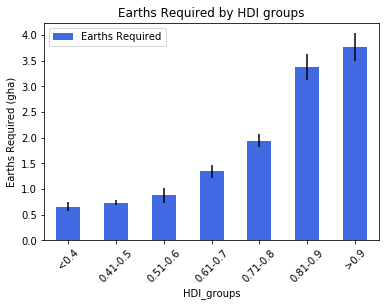

In [33]:
HDI_Earth_Reqd.plot.bar(y= 'Earths Required', color = 'royalblue', yerr= HDI_earth_sem )
plt.xticks(rotation = 45)
plt.ylabel('Earths Required (gha)')
plt.title ('Earths Required by HDI groups')
plt.legend(loc = 'upper left')

In [36]:
HDI_Footprint= Global_footprint_df.groupby("HDI_groups").mean()['Total Ecological Footprint']
HDI_Footprint = pd.DataFrame(HDI_Footprint)
HDI_Footprint

,Total Ecological Footprint
HDI_groups,
<0.4,1.132857
0.41-0.5,1.263077
0.51-0.6,1.516842
0.61-0.7,2.323600
0.71-0.8,3.366346
0.81-0.9,5.845000
>0.9,6.518182


In [37]:
HDI_biocapacity= Global_footprint_df.groupby("HDI_groups").mean()['Total Biocapacity']
HDI_biocapacity = pd.DataFrame(HDI_biocapacity)
HDI_biocapacity

,Total Biocapacity
HDI_groups,
<0.4,2.140000
0.41-0.5,1.498462
0.51-0.6,2.146316
0.61-0.7,6.044400
0.71-0.8,4.068846
0.81-0.9,3.098125
>0.9,6.178182


In [48]:
HDI_Deficit= Global_footprint_df.groupby("HDI_groups").mean()['Biocapacity Deficit or Reserve']
HDI_Deficit = pd.DataFrame(HDI_Deficit)

Text(0, 0.5, 'Biocapacity Deficit or Reserve')

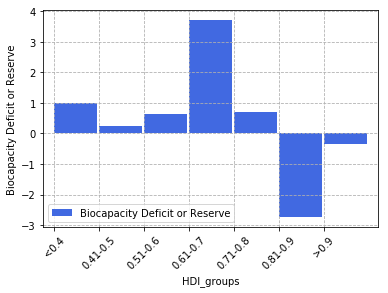

In [50]:
HDI_Deficit.plot.bar(y= 'Biocapacity Deficit or Reserve', width = 0.95, color ='royalblue',align ='edge')
plt.xticks(rotation = 45)
plt.grid(True, linestyle= 'dashed')
plt.ylabel('Biocapacity Deficit or Reserve')
